In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
from common import display_input_data, check_input_data_indices, train_model, prepare_dataset, evaluate_model, \
    run_input_optimizer, calculate_accuracy, calculate_error_rate
import pandas as pd
import ipywidgets as widgets
import numpy as np
import itertools
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [3]:
# Parameters
# Chose variables to create the model
input_cols = ['shape', 'profile_entrance', 'rising_entrance', 'rising_exit', 'shards', 'feathering', 'entrance_mounding', 'center_mounding', 'exit_mounding']
result_col = 'result'
# Load the train and the validation datasets for blade class prediction
train_dataset_file = '../DATA/Train/blade_prediction_train.xlsx'
test_dataset_file = '../DATA/Validation/blade_prediction_validation.xlsx'

In [4]:
# check that all inputs correspond 
check_input_data_indices(train_dataset_file, test_dataset_file, input_cols)

#preparing the test dataset 
from sklearn.model_selection import train_test_split
x, y = prepare_dataset(train_dataset_file, input_cols, result_col)
#con 48 ottengo accuracy del 79
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=61)
print(x)
print(y)
x.shape
y.shape

Datasets are compatible
     shape_E  shape_indeterminate  profile_entrance_V  \
0      False                 True                True   
1      False                 True               False   
2      False                 True               False   
3      False                 True               False   
4      False                 True               False   
..       ...                  ...                 ...   
275     True                False                True   
276     True                False                True   
277     True                False                True   
278     True                False                True   
279     True                False                True   

     rising_entrance_bilateral  rising_entrance_single  rising_exit_bilateral  \
0                        False                    True                  False   
1                        False                    True                   True   
2                        False                  

(280,)

In [5]:
import pickle

logReg = LogisticRegression(solver='saga', penalty='l2', C=1)
logReg.fit(x, y)

filename = '../models/blade-bevel_final.pickle'
pickle.dump(logReg, open(filename, 'wb'))

print(f'Saved model to {filename}')


Saved model to ../models/blade-bevel_final.pickle


In [6]:
from sklearn.metrics import make_scorer, precision_score, f1_score, recall_score, roc_auc_score, classification_report, accuracy_score
from sklearn.model_selection import cross_validate
# Define custom scoring metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score)
}

scores = cross_validate(logReg, x, y, cv=10, scoring= scoring, return_train_score= True)
#printing the score for each of the cv 
scores

#here we have the mean score and the standard deviation
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
#here is printing the score using the cross-validation

{'fit_time': array([0.01343584, 0.01581907, 0.01364493, 0.01474738, 0.01099777,
        0.01248717, 0.01533723, 0.10935235, 0.01167202, 0.00799584]),
 'score_time': array([0.02642655, 0.02079821, 0.02133703, 0.02196598, 0.01661015,
        0.01821828, 0.01677275, 0.02538371, 0.01712203, 0.02108073]),
 'test_precision': array([0.85714286, 1.        , 0.8       , 0.81818182, 0.8       ,
        0.74074074, 0.74074074, 0.95238095, 0.85714286, 0.82608696]),
 'train_precision': array([0.89944134, 0.87431694, 0.92613636, 0.92090395, 0.88268156,
        0.88172043, 0.87634409, 0.88764045, 0.90340909, 0.90340909]),
 'test_recall': array([0.9 , 0.95, 0.4 , 0.45, 1.  , 1.  , 1.  , 1.  , 0.9 , 0.95]),
 'train_recall': array([0.89444444, 0.88888889, 0.90555556, 0.90555556, 0.87777778,
        0.91111111, 0.90555556, 0.87777778, 0.88333333, 0.88333333]),
 'test_f1_score': array([0.87804878, 0.97435897, 0.53333333, 0.58064516, 0.88888889,
        0.85106383, 0.85106383, 0.97560976, 0.87804878, 0.883

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score



In [8]:
# by default the cross val uses the score function (for classification is accuracy.)
# if the sample is unbalanced, the use the f1 score i.e scoring = 'f1'. this can help with hyperparameter optimization. 

#scores = cross_val_score(logReg, x, y, cv=10)
#printing the score for each of the cv 
# score in this case is associated with the scoring parameter (see below and can be modified)
#scores

#here we have the mean score and the standard deviation
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [9]:
x_test, y_test = prepare_dataset(test_dataset_file, input_cols, result_col)
y_pred = logReg.predict(x_test)
# predicting  
print('prediction with threshold 0.5 :') 


# changing threshold and predicting 
print('prediction with threshold 0.9 :') 
y_pred_new_threshold = (logReg.predict_proba(x_test)[:, 1] >= 0.6).astype(int) 
print(y_pred_new_threshold)

target_names = ['double', 'single']

# Evaluation metrics for default threshold 
print("Evaluation metrics with threshold 0.5:") 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Precision:", precision_score(y_test, y_pred)) 
print("Recall:", recall_score(y_test, y_pred)) 
print("F1 score:", f1_score(y_test, y_pred))


class_report = classification_report(y_test, y_pred, target_names=target_names)
print(class_report)


# 
# # Evaluation metrics for new threshold 
# print("Evaluation metrics with threshold 0.6:") 
# print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold)) 
# print("Precision:", precision_score(y_test, y_pred_new_threshold)) 
# print("Recall:", recall_score(y_test, y_pred_new_threshold)) 
# print("F1 score:", f1_score(y_test, y_pred_new_threshold))
# class_report = classification_report(y_test, y_pred_new_threshold)
# print(class_report)

prediction with threshold 0.5 :
prediction with threshold 0.9 :
[1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1]
Evaluation metrics with threshold 0.5:
Accuracy: 0.7761194029850746
Precision: 0.8478260869565217
Recall: 0.8297872340425532
F1 score: 0.8387096774193549
              precision    recall  f1-score   support

      double       0.62      0.65      0.63        20
      single       0.85      0.83      0.84        47

    accuracy                           0.78        67
   macro avg       0.73      0.74      0.74        67
weighted avg       0.78      0.78      0.78        67


In [10]:
# from sklearn.metrics import roc_curve
# 
# # ROC Curve 
# y_scores = logReg.predict_proba(x_test)[:, 1] 
# fpr, tpr, thresholds = roc_curve(y_test, y_scores) 
# plt.plot(fpr, tpr,  label = 'Threshold = 0.5') 
# print('Area Under the ROC Curve for threshold 0.5:', roc_auc_score(y_test, y_scores)) 
#   
# # For Threshold 0.9 
# fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_new_threshold) 
# print('Area Under the ROC Curve for threshold 0.9:', roc_auc_score(y_test, y_pred_new_threshold)) 
# plt.plot(fpr_, tpr_, label = 'Threshold = 0.9') 
#   
# plt.xlabel('False Positive Rate') 
# plt.ylabel('True Positive Rate') 
# plt.title('ROC Curve') 
# plt.legend() 
# plt.show()



In [11]:
# y_pred = logReg.predict(prepare_dataset(test_dataset_file, input_cols))
# #get the column from the test dataset 
# df = pd.read_excel(test_dataset_file)
# y_df = df[result_col].str.strip()
# y = pd.get_dummies(y_df, drop_first=True).iloc[:, 0]

In [12]:
from sklearn.metrics import confusion_matrix



# plot confusion matrix
cm_dot_five = confusion_matrix(y_test, y_pred)
cm_dot_five


#we have to focus on the fact that is has a good precison 

array([[13,  7],
       [ 8, 39]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

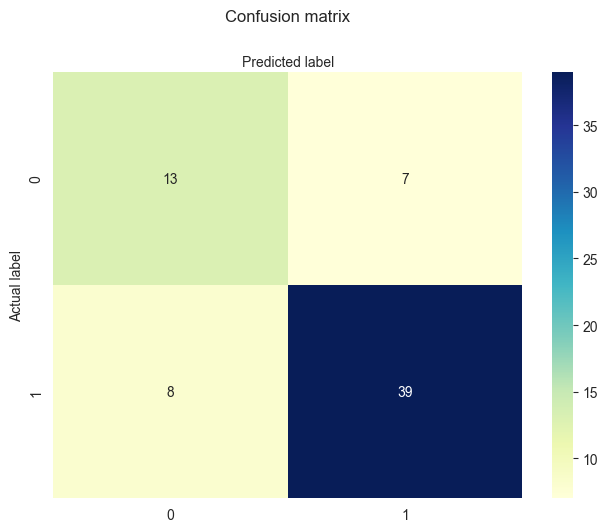

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cm_dot_five), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [14]:
# use gridsearch to find the best hyperparameters using cross-validation 
# set the dictionaries for the best parameter combination 
param_grid = {

    'solver': [ 'saga', 'sag'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'penalty': [ 'l2'] 
}

grid_search = GridSearchCV(estimator = LogisticRegression(), refit='accuracy',  param_grid= param_grid, scoring=['accuracy'], cv=10,)


grid_result = grid_search.fit(x, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\gstei\Documents\GitHub\dissertation-steiger-2022\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gstei\Documents\GitHub\dissertation-steiger-2022\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gstei\Documents\GitHub\dissertation-steiger-2022\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gstei\Documents\GitHub\dissertation-steiger-2022\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\gstei\Documents\GitHub\dissertation-steiger-2022\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

Best: 0.775000 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}


In [15]:
probs_y= logReg.predict_proba(prepare_dataset(test_dataset_file, input_cols))
print(probs_y)

[[0.3967174  0.6032826 ]
 [0.02701633 0.97298367]
 [0.42780883 0.57219117]
 [0.58833442 0.41166558]
 [0.01398959 0.98601041]
 [0.58833442 0.41166558]
 [0.69056662 0.30943338]
 [0.12539858 0.87460142]
 [0.16123734 0.83876266]
 [0.52112678 0.47887322]
 [0.20584806 0.79415194]
 [0.3967174  0.6032826 ]
 [0.23547808 0.76452192]
 [0.58817177 0.41182823]
 [0.53300897 0.46699103]
 [0.14506532 0.85493468]
 [0.96234899 0.03765101]
 [0.27032853 0.72967147]
 [0.76832092 0.23167908]
 [0.31029367 0.68970633]
 [0.23738564 0.76261436]
 [0.03028289 0.96971711]
 [0.00633588 0.99366412]
 [0.00476774 0.99523226]
 [0.02025749 0.97974251]
 [0.06869892 0.93130108]
 [0.09845121 0.90154879]
 [0.03354596 0.96645404]
 [0.5048089  0.4951911 ]
 [0.83750199 0.16249801]
 [0.82259862 0.17740138]
 [0.82259862 0.17740138]
 [0.85517204 0.14482796]
 [0.4128178  0.5871822 ]
 [0.86007478 0.13992522]
 [0.86007478 0.13992522]
 [0.87288198 0.12711802]
 [0.77578379 0.22421621]
 [0.58833442 0.41166558]
 [0.00651233 0.99348767]


In [16]:
#build dataframe with result, expected result and label 
df = pd.read_excel(test_dataset_file)
label = df["label"]

data = {'label': label, 'result': y_pred, "expected_result" : y_test}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
   
print(df)  

grouped_df = df.groupby(by = "label")

# calculate the accuracy for the four knives that are single blade 

one = grouped_df.get_group(1)
five = grouped_df.get_group(5)
six = grouped_df.get_group(6)
seven = grouped_df.get_group(7)

single_bladed = pd.concat([one, five, six, seven], ignore_index= True)
print(f'single bladed\n{single_bladed}\n')
single_bladed_accuracy = calculate_accuracy(single_bladed)

print( "For single blade class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", single_bladed_accuracy, "\n")


    label  result  expected_result
0       2    True             True
1       2    True             True
2       2    True             True
3       2   False             True
4       2    True             True
..    ...     ...              ...
62      1    True             True
63      1    True             True
64      1    True             True
65      1   False             True
66      1    True             True

[67 rows x 3 columns]
single bladed
    label  result  expected_result
0       1    True             True
1       1   False             True
2       1    True             True
3       1   False             True
4       1    True             True
5       1    True             True
6       1    True             True
7       1    True             True
8       1   False             True
9       1    True             True
10      5    True             True
11      5    True             True
12      5    True             True
13      5    True             True
14      5    True 

In [17]:
# calculate accuracy of the double-edge class
two = grouped_df.get_group(2)
three = grouped_df.get_group(3)
four = grouped_df.get_group(4)

even_bladed = pd.concat([two, three, four], ignore_index= True)
print(f'even bladed\n{even_bladed}\n')
even_bladed_accuracy = calculate_accuracy(even_bladed)

print( "For even blade class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", even_bladed_accuracy, "\n")

even bladed
    label  result  expected_result
0       2    True             True
1       2    True             True
2       2    True             True
3       2   False             True
4       2    True             True
5       2   False             True
6       2   False             True
7       2    True             True
8       2    True             True
9       2   False             True
10      3   False            False
11      3   False            False
12      3   False            False
13      3   False            False
14      3    True            False
15      3   False            False
16      3   False            False
17      3   False            False
18      3   False            False
19      3   False            False
20      4    True            False
21      4    True            False
22      4    True            False
23      4   False            False
24      4   False            False
25      4    True            False
26      4   False            False
27      

In [18]:
# accuracy for even bladed without the knife number 4

two = grouped_df.get_group(2)
three = grouped_df.get_group(3)


even_bladed = pd.concat([two, three], ignore_index= True)
print(f'even bladed\n{even_bladed}\n')
even_bladed_accuracy = calculate_accuracy(even_bladed)

print( "For even blade class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", even_bladed_accuracy, "\n")

even bladed
    label  result  expected_result
0       2    True             True
1       2    True             True
2       2    True             True
3       2   False             True
4       2    True             True
5       2   False             True
6       2   False             True
7       2    True             True
8       2    True             True
9       2   False             True
10      3   False            False
11      3   False            False
12      3   False            False
13      3   False            False
14      3    True            False
15      3   False            False
16      3   False            False
17      3   False            False
18      3   False            False
19      3   False            False

For even blade class
accuracy %: 75.0 


In [19]:
#calculate accuracy for each knife class using the new model
for name, sub_df in grouped_df:
    print(f'{name}\n{sub_df}\n')
for name, sub_df in grouped_df:
    accuracy_perc = calculate_accuracy(sub_df)
    
    print( "knife:", name) 
    print( "accuracy %:", accuracy_perc, "\n")

1
    label  result  expected_result
57      1    True             True
58      1   False             True
59      1    True             True
60      1   False             True
61      1    True             True
62      1    True             True
63      1    True             True
64      1    True             True
65      1   False             True
66      1    True             True

2
   label  result  expected_result
0      2    True             True
1      2    True             True
2      2    True             True
3      2   False             True
4      2    True             True
5      2   False             True
6      2   False             True
7      2    True             True
8      2    True             True
9      2   False             True

3
    label  result  expected_result
29      3   False            False
30      3   False            False
31      3   False            False
32      3   False            False
33      3    True            False
34      3   False      